In [1]:
%cd ../..

/home/work/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.dynamical_ball import dynamical_ball
from examples.bouncing_ball import bouncing_ball_data
from combinators.model import foldable
from combinators.inference import importance, mcmc
from combinators import utils

In [3]:
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection

import matplotlib.pyplot as plt
from matplotlib import cycler
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn.apionly import color_palette

/home/work/anaconda3/envs/funcytorch/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
sns.set()
sns.set_context("paper")
sns.set_palette('colorblind')

In [6]:
color_cycler = cycler(color=color_palette('colorblind'))
len(color_cycler)

10

In [7]:
column_width = 3.3
page_width = 6.7

In [8]:
plt.rc('legend', frameon=False)
plt.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
plt.rc('savefig', dpi=300)
plt.rc('font', size=8)
plt.rc('axes', prop_cycle=color_cycler)

In [9]:
results_dict = torch.load('examples/dynamical_ball/experiment_results.data')

In [10]:
results_dict.keys()

dict_keys([('Monte Carlo importance sampling', 2, 'elbo'), ('Monte Carlo importance sampling', 10, 'elbo'), ('Monte Carlo importance sampling', 100, 'elbo'), ('Monte Carlo importance sampling', 2, 'eubo'), ('Monte Carlo importance sampling', 10, 'eubo'), ('Monte Carlo importance sampling', 100, 'eubo'), ('Importance Weighted sampling', 2, 'elbo'), ('Importance Weighted sampling', 10, 'elbo'), ('Importance Weighted sampling', 100, 'elbo'), ('Importance Weighted sampling', 2, 'eubo'), ('Importance Weighted sampling', 10, 'eubo'), ('Importance Weighted sampling', 100, 'eubo'), ('Sequential Monte Carlo', 2, 'elbo'), ('Sequential Monte Carlo', 10, 'elbo'), ('Sequential Monte Carlo', 100, 'elbo'), ('Sequential Monte Carlo', 2, 'eubo'), ('Sequential Monte Carlo', 10, 'eubo'), ('Sequential Monte Carlo', 100, 'eubo')])

In [11]:
SAMPLING_STRATEGIES = ['Monte Carlo importance sampling', 'Importance Weighted sampling', 'Sequential Monte Carlo']
sampling_strategies = ['Monte Carlo', 'Importance Weighted', 'Sequential Monte Carlo']
sample_sizes = [2, 10, 100]
bounds = ['elbo', 'eubo']
training_methods = ['Variational', 'Wake-sleep']

In [12]:
for key in results_dict:
    (trace, (elbos, eubos)) = results_dict[key]
    results_dict[key] = (elbos.detach().numpy(), eubos.detach().numpy())

In [13]:
def experiment_elbos(strategy, bound):
    result = {'Epoch': [], 'K': [], 'ELBO': []}
    for k in sample_sizes:
        elbos = results_dict[(strategy, k, bound)][0]
        for i in range(len(elbos)):
            result['Epoch'].append(i)
            result['K'].append('K=%d' % k)
            result['ELBO'].append(elbos[i])
    return result

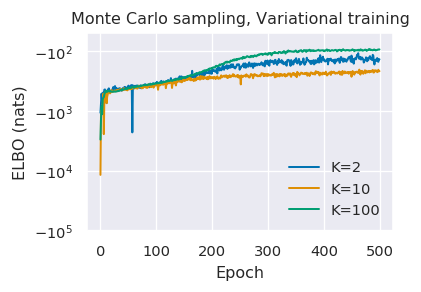

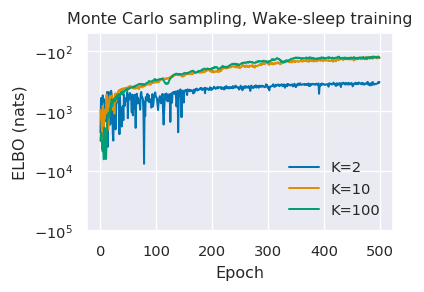

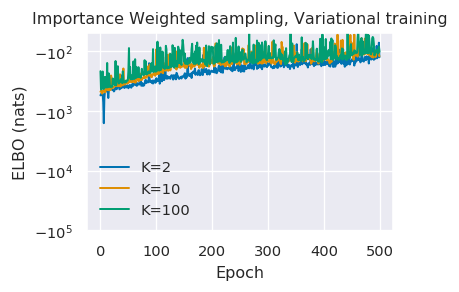

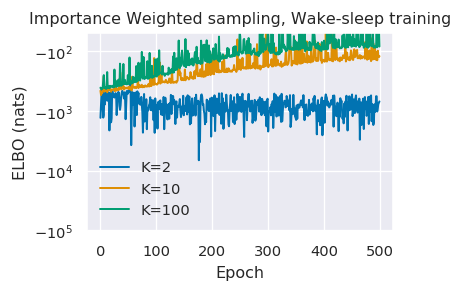

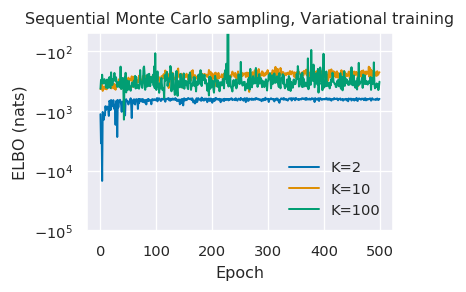

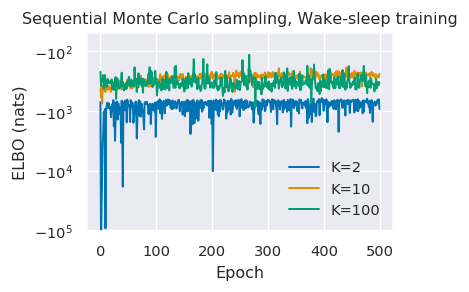

In [14]:
for (i, strategy) in enumerate(SAMPLING_STRATEGIES):
    for (j, bound) in enumerate(bounds):
        for k in sample_sizes:
            elbos = results_dict[(strategy, k, bound)][0]
            plt.yscale('symlog')
            plt.plot(elbos, label='K=%d' % k)
        plt.legend()
        plt.ylim((-10e4, -5e1))
        plt.ylabel('ELBO (nats)')
        plt.xlabel('Epoch')
        plt.title('%s sampling, %s training' % (sampling_strategies[i], training_methods[j]))
        plt.savefig('%s_%s.pdf' % (sampling_strategies[i], training_methods[j]))
        plt.show()

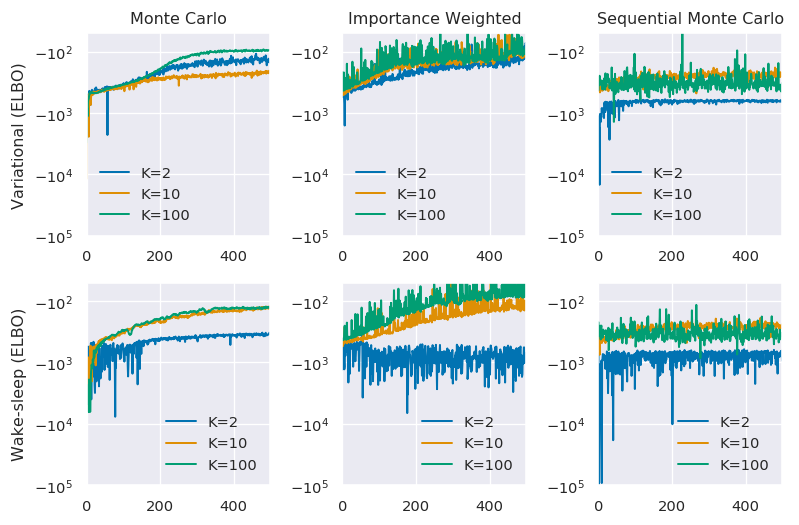

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3,
                         figsize=(page_width, 
                                  0.66 * page_width),
                         dpi=120)
for (i, strategy) in enumerate(SAMPLING_STRATEGIES):
    for (j, bound) in enumerate(bounds):
        for k in sample_sizes:
            elbos = results_dict[(strategy, k, bound)][0]
            axes[j, i].plot(elbos, label='K=%d' % k)
            axes[j, i].legend()
            axes[j, i].set_xlim((0, 500))
            axes[j, i].set_ylim((-10e4, -5e1))
            axes[j, i].set_yscale('symlog')
        axes[j, 0].set_ylabel(training_methods[j] + ' (ELBO)')
    axes[0, i].set_title(sampling_strategies[i])
fig.tight_layout()
plt.savefig('dynamical_ball_inference_comparison.pdf')
plt.show()